In [1]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

from rpy2.robjects.packages import STAP
with open('qEI_call.r', 'r') as f:
    string = f.read()
qEI = STAP(string, "qEI_call")
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as rpyn
rcpp = importr("Rcpp")
rcpp.sourceCpp('qEI.cpp')

/Users/nimishawalgaonkar/anaconda2/envs/scikit_optimize_develop/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/nimishawalgaonkar/anaconda2/envs/scikit_optimize_develop/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


R object with classes: ('list',) mapped to:
<ListVector - Python:0x1c28bbea88 / R:0x7f85827a54d0>
[StrVector, StrVector, StrVector, StrVector]
  functions: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x1c28bbd5c8 / R:0x7f85826e67f8>
['v1cpp', 'v2cpp', 'r_cpp', 'qEI_cpp']
  modules: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x1c28bbb648 / R:0x7f85827e7dc0>
[]
  cppSourcePath: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x1c28bbbc08 / R:0x7f858302c8f8>
['/Users/nimishawalgaonkar/Desktop/argonne_interns...]
  buildDirectory: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x1c28e14c08 / R:0x7f858302c898>
['/private/var/folders/gb/vdsbv89172b7s2ckdmxgsxqr...]

<Figure size 432x288 with 0 Axes>

In [2]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

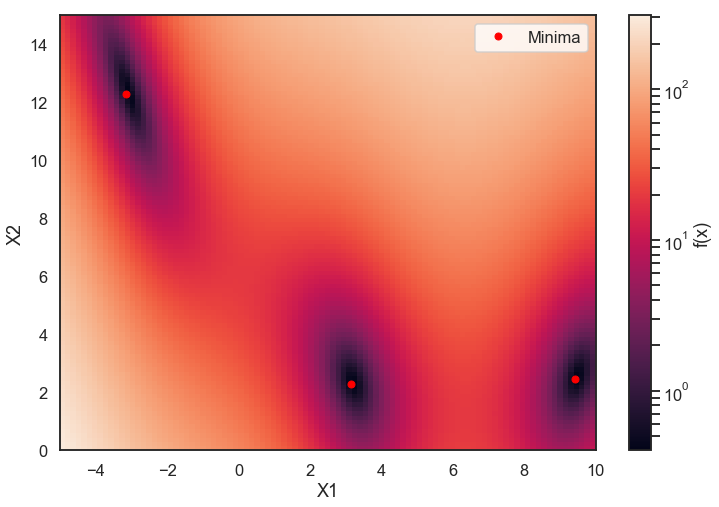

In [3]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

In [4]:
ntrain = 50 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

# 1. Constant Liar Strategy

Points to look into 
1. Check the space which constant liar strategy is using
2. Fix "sampling" for how to choose points


In [5]:
opt = Optimizer(bounds, base_estimator="gp", acq_func = 'EI',
                acq_optimizer = 'sampling', random_state = 123)

In [6]:
opt.acq_optimizer

'sampling'

In [7]:
opt.tell(X_train.tolist(), Y_train.tolist())

we are here :: other Acq than qEI


          fun: 0.454993414507193
    func_vals: array([ 38.02139204,   6.84686835,   3.84769098,  46.59864996,
       106.03068841,  17.26558586,  57.94172046,  12.99403395,
        37.08600539,  33.22398312, 138.778057  ,  44.41353045,
        20.17648984,  15.83438464,  16.37311789,  21.60955363,
       177.84822597, 101.88955032,  59.36459719,  17.42976814,
        29.01136075, 137.9990274 ,  47.63844269,  15.39186586,
        28.03105857,  60.11433157,  17.99784872, 113.18550174,
        43.29446292,  98.12992219,  26.65863116, 170.3432751 ,
        30.36408375,  18.13490032,   9.10906695,   3.83218899,
         6.91201808,   0.45499341,  87.91668479,  53.59800883,
       171.20195916,  84.1924601 ,  26.90390004,  70.32490478,
       218.07823256,  53.36640107,  39.32534174,  11.68385873,
        94.2446718 ,   3.72747342])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=[1, 1], nu=2.5) + WhiteKernel(noise_leve

In [8]:
opt.ask()

[9.959136814295084, 1.3815586587454889]

# Have made following changes to optimizer.py

After calling ask() method for object optimizer, an attribute opt.Xspace is created to save the points over which optimizer is looking for new points. This will help in using approx_qEI function for this space.

In [9]:
num_queries = [10,30,100, 300]

In [10]:
#import timeit

#start = timeit.default_timer()

####Your statements here

#stop = timeit.default_timer()

#print stop - start 

In [11]:
import timeit

all_points = []
time_tk = []
for query in num_queries:
    start = timeit.default_timer()
    next_points = opt.ask(n_points= query)
    stop = timeit.default_timer()
    t = stop - start
    time_tk.append(t)
    print ('Time taken for queries' + str(query) + ':' + str(t)) 
    all_points.append(next_points)

we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
Time taken for queries10:3.5229438779933844
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we a

we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here :: other Acq than qEI
we are here ::

In [12]:
time_tk
np.savetxt('t1.txt', time_tk)

# 2. qEI Approximation

In [13]:
X_space = np.array(opt.space.inverse_transform(opt.Xspace)) # this is going to be of help later on with approx qEI/

In [14]:
def neg_branin(x):
    y = -1*branin(x)
    return y

In [15]:
def plot_neg_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([neg_branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx)
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")
    
    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    plt.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

# Number test batches = 400

In [16]:
num_dim = 2
num_test_batches = 400
#num_sampled_points = 10
num_iter = 1

sampling_strategy = 'manual2'
norm = False # we need to do unnormalization of LHS sampled points

Xt = X_train
Yt = Y_train

bb = []
sc = []
bb_array = np.empty((0, 2))

time_tk2 = []


max_obj = np.max(Yt)
# Train the model on the previous data
OOPT = Optimizer(bounds)
OOPT.tell(Xt.tolist(), Yt.tolist())
model = opt.models[-1]
batches = []
cc_vec = np.zeros(num_test_batches)

for num_sampled_points in num_queries:
    
    start = timeit.default_timer()

    for i in range(num_test_batches):
        
        if sampling_strategy == 'manual2':
            rel_ind = np.random.choice(X_space.shape[0], num_sampled_points, replace=False)
            b = X_space[rel_ind,:]
        else:
            print ("No such sampling strategy exists ..")
    
        
        b_model = opt.space.transform(b.tolist())
        batches.append(b)
        mean, covar = model.predict(b_model, return_cov=True)
        cc = qEI.qEI_approx(mean, covar, max_obj)
        cc_num = rpyn.ri2py(cc)
        cc_vec[i] = cc_num

        max_qEI_val = np.max(cc_vec)
        max_qEI_val_ind = np.argmax(cc_vec)
        best_batch = batches[max_qEI_val_ind]
        bb.append(best_batch)


    stop = timeit.default_timer()
    t = stop - start
    time_tk2.append(t)
    print ('Time taken for queries' + str(num_sampled_points) + ':' + str(t))     

we are here :: other Acq than qEI


ValueError: too many values to unpack (expected 3)

In [ ]:
time_tk2
np.savetxt('t2.txt', time_tk2)

# Number test batches = 4000

In [ ]:
num_dim = 2
num_test_batches = 4000
#num_sampled_points = 10
num_iter = 1

sampling_strategy = 'manual2'
norm = False # we need to do unnormalization of LHS sampled points

Xt = X_train
Yt = Y_train

bb = []
sc = []
bb_array = np.empty((0, 2))

time_tk3 = []


max_obj = np.max(Yt)
# Train the model on the previous data
OOPT = Optimizer(bounds)
OOPT.tell(Xt.tolist(), Yt.tolist())
model = opt.models[-1]
batches = []
cc_vec = np.zeros(num_test_batches)

for num_sampled_points in num_queries:
    
    start = timeit.default_timer()

    for i in range(num_test_batches):
        
        if sampling_strategy == 'manual2':
            rel_ind = np.random.choice(X_space.shape[0], num_sampled_points, replace=False)
            b = X_space[rel_ind,:]
        else:
            print ("No such sampling strategy exists ..")
    
        
        b_model = opt.space.transform(b.tolist())
        batches.append(b)
        mean, covar = model.predict(b_model, return_cov=True)
        cc = qEI.qEI_approx(mean, covar, max_obj)
        cc_num = rpyn.ri2py(cc)
        cc_vec[i] = cc_num

        max_qEI_val = np.max(cc_vec)
        max_qEI_val_ind = np.argmax(cc_vec)
        best_batch = batches[max_qEI_val_ind]
        bb.append(best_batch)


    stop = timeit.default_timer()
    t = stop - start
    time_tk3.append(t)
    print ('Time taken for queries' + str(num_sampled_points) + ':' + str(t))     

In [ ]:
np.savetxt('t3.txt', time_tk3)

# Number test batches = 40000

In [ ]:
num_dim = 2
num_test_batches = 40000
#num_sampled_points = 10
num_iter = 1

sampling_strategy = 'manual2'
norm = False # we need to do unnormalization of LHS sampled points

Xt = X_train
Yt = Y_train

bb = []
sc = []
bb_array = np.empty((0, 2))

time_tk4 = []


max_obj = np.max(Yt)
# Train the model on the previous data
OOPT = Optimizer(bounds)
OOPT.tell(Xt.tolist(), Yt.tolist())
model = opt.models[-1]
batches = []
cc_vec = np.zeros(num_test_batches)

for num_sampled_points in num_queries:
    
    start = timeit.default_timer()

    for i in range(num_test_batches):
        
        if sampling_strategy == 'manual2':
            rel_ind = np.random.choice(X_space.shape[0], num_sampled_points, replace=False)
            b = X_space[rel_ind,:]
        else:
            print ("No such sampling strategy exists ..")
    
        
        b_model = opt.space.transform(b.tolist())
        batches.append(b)
        mean, covar = model.predict(b_model, return_cov=True)
        cc = qEI.qEI_approx(mean, covar, max_obj)
        cc_num = rpyn.ri2py(cc)
        cc_vec[i] = cc_num

        max_qEI_val = np.max(cc_vec)
        max_qEI_val_ind = np.argmax(cc_vec)
        best_batch = batches[max_qEI_val_ind]
        bb.append(best_batch)


    stop = timeit.default_timer()
    t = stop - start
    time_tk4.append(t)
    print ('Time taken for queries' + str(num_sampled_points) + ':' + str(t))     

In [ ]:
np.savetxt('t4.txt', time_tk4)

In [ ]:
import matplotlib.pyplot as plot
import seaborn as sns
sns.set_context("talk", font_scale=1.6)
%matplotlib inline

In [ ]:
time_tk = np.array(time_tk)
time_tk2 = np.array(time_tk2)
time_tk3 = np.array(time_tk3)
time_tk4 = np.array(time_tk4)

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(np.array(num_queries), time_tk, color = 'r', label="const liar")
plt.plot(np.array(num_queries), time_tk2, color = 'b', label = 'approx qei ; batch = 400')
plt.plot(np.array(num_queries), time_tk3, color = 'g', label = 'approx qei ; batch = 4000')
plt.plot(np.array(num_queries), time_tk4, color = 'k', label = 'approx qei ; batch = 40000')
plt.legend(loc = 'best')
plt.xlabel('Number of datapoints to query next')
plt.ylabel('Time taken in seconds')


In [ ]:
num_queries = [10,30,100, 300, 500, 1000, 1500]
num_dim = 2
num_test_batches = 400
#num_sampled_points = 10
num_iter = 1

sampling_strategy = 'manual2'
norm = False # we need to do unnormalization of LHS sampled points

Xt = X_train
Yt = Y_train

bb = []
sc = []
bb_array = np.empty((0, 2))

time_tk5 = []


max_obj = np.max(Yt)
# Train the model on the previous data
OOPT = Optimizer(bounds)
OOPT.tell(Xt.tolist(), Yt.tolist())
model = opt.models[-1]
batches = []
cc_vec = np.zeros(num_test_batches)

for num_sampled_points in num_queries:
    
    start = timeit.default_timer()

    for i in range(num_test_batches):
        
        if sampling_strategy == 'manual2':
            rel_ind = np.random.choice(X_space.shape[0], num_sampled_points, replace=False)
            b = X_space[rel_ind,:]
        else:
            print ("No such sampling strategy exists ..")
    
        
        b_model = opt.space.transform(b.tolist())
        batches.append(b)
        mean, covar = model.predict(b_model, return_cov=True)
        cc = qEI.qEI_approx(mean, covar, max_obj)
        cc_num = rpyn.ri2py(cc)
        cc_vec[i] = cc_num

        max_qEI_val = np.max(cc_vec)
        max_qEI_val_ind = np.argmax(cc_vec)
        best_batch = batches[max_qEI_val_ind]
        bb.append(best_batch)


    stop = timeit.default_timer()
    t = stop - start
    time_tk5.append(t)
    print ('Time taken for queries' + str(num_sampled_points) + ':' + str(t))     

In [ ]:
num_queries = [10,30,100, 300, 500, 1000, 1500]
num_dim = 2
num_test_batches = 4000
#num_sampled_points = 10
num_iter = 1

sampling_strategy = 'manual2'
norm = False # we need to do unnormalization of LHS sampled points

Xt = X_train
Yt = Y_train

bb = []
sc = []
bb_array = np.empty((0, 2))

time_tk6 = []


max_obj = np.max(Yt)
# Train the model on the previous data
OOPT = Optimizer(bounds)
OOPT.tell(Xt.tolist(), Yt.tolist())
model = opt.models[-1]
batches = []
cc_vec = np.zeros(num_test_batches)

for num_sampled_points in num_queries:
    
    start = timeit.default_timer()

    for i in range(num_test_batches):
        
        if sampling_strategy == 'manual2':
            rel_ind = np.random.choice(X_space.shape[0], num_sampled_points, replace=False)
            b = X_space[rel_ind,:]
        else:
            print ("No such sampling strategy exists ..")
    
        
        b_model = opt.space.transform(b.tolist())
        batches.append(b)
        mean, covar = model.predict(b_model, return_cov=True)
        cc = qEI.qEI_approx(mean, covar, max_obj)
        cc_num = rpyn.ri2py(cc)
        cc_vec[i] = cc_num

    max_qEI_val = np.max(cc_vec)
    max_qEI_val_ind = np.argmax(cc_vec)
    best_batch = batches[max_qEI_val_ind]
    bb.append(best_batch)


    stop = timeit.default_timer()
    t = stop - start
    time_tk6.append(t)
    print ('Time taken for queries' + str(num_sampled_points) + ':' + str(t))     

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(np.array(num_queries), time_tk5, color = 'b', label = 'approx qei ; batch = 400')
plt.plot(np.array(num_queries), time_tk6, color = 'g', label = 'approx qei ; batch = 4000')
plt.legend(loc = 'best')